In [1]:
from sklearn.datasets import fetch_california_housing

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=fetch_california_housing()

In [5]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [9]:
data.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [11]:
df=pd.DataFrame(data.data,columns = data.feature_names)

In [13]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [15]:
df['Price']=data.target

In [17]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [19]:
#multicollinearity >> when one feature is explained by all other features
#when two features >> colreation
#more than two features >> VIF,clustermap

<Axes: >

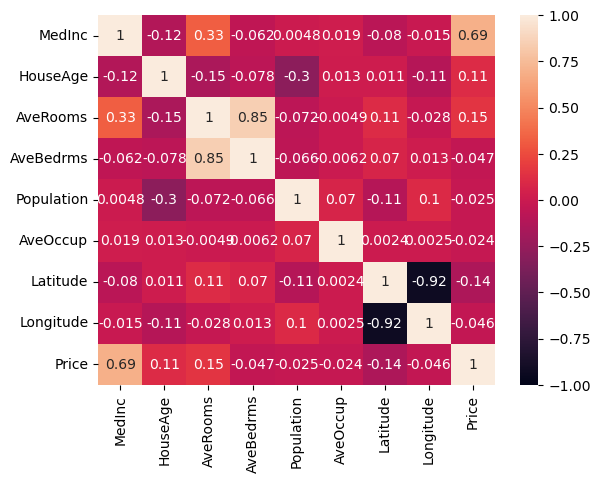

In [21]:
sns.heatmap(df.corr(),annot = True, vmin = -1, vmax = 1)

<Figure size 500x500 with 0 Axes>

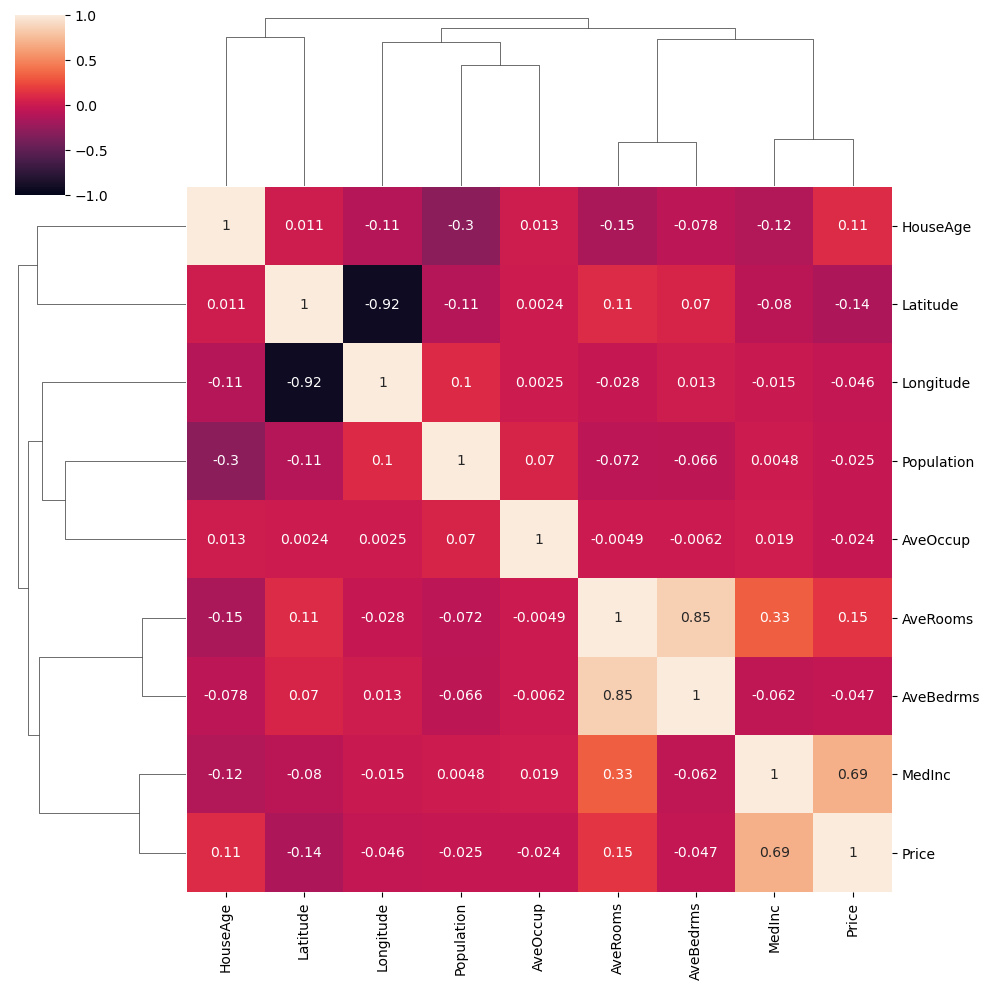

In [23]:
#clustermap table shows group(cluster) relationship
plt.figure(figsize =(5,5))
sns.clustermap(df.corr(),vmin = -1,vmax = 1,annot=True)

In [25]:
#VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif= pd.DataFrame()
vif['Feature']=df.columns
vif

,Feature
0,MedInc
1,HouseAge
2,AveRooms
3,AveBedrms
4,Population
5,AveOccup
6,Latitude
7,Longitude
8,Price


In [27]:
vif['vif']=[variance_inflation_factor(df.values,i) for i in range(len(df.columns))]

In [29]:
vif

,Feature,vif
0,MedInc,19.624998
1,HouseAge,7.592663
2,AveRooms,47.956351
3,AveBedrms,45.358192
4,Population,2.936078
5,AveOccup,1.099530
6,Latitude,568.497332
7,Longitude,640.064211
8,Price,9.285659


In [31]:
df1=df.copy()

In [33]:
df1

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [35]:
df1.drop("Longitude",axis=1,inplace=True)

In [37]:
df1

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,3.422
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,0.847


In [39]:
vif= pd.DataFrame()
vif['Feature']=df1.columns
vif

,Feature
0,MedInc
1,HouseAge
2,AveRooms
3,AveBedrms
4,Population
5,AveOccup
6,Latitude
7,Price


In [41]:
vif['vif']=[variance_inflation_factor(df1.values,i) for i in range(len(df1.columns))]

In [43]:
vif

,Feature,vif
0,MedInc,18.639889
1,HouseAge,7.346583
2,AveRooms,44.714760
3,AveBedrms,42.072000
4,Population,2.796280
5,AveOccup,1.099394
6,Latitude,22.873934
7,Price,9.193500


In [45]:
df1.drop('AveRooms',axis=1,inplace=True)
vif= pd.DataFrame()
vif['Feature']=df1.columns
vif['vif']=[variance_inflation_factor(df1.values,i) for i in range(len(df1.columns))]

In [47]:
vif

,Feature,vif
0,MedInc,10.584081
1,HouseAge,7.260588
2,AveBedrms,6.440667
3,Population,2.762794
4,AveOccup,1.098719
5,Latitude,22.094483
6,Price,8.674858


In [49]:
df1.drop('Latitude',axis=1,inplace=True)
vif= pd.DataFrame()
vif['Feature']=df1.columns
vif['vif']=[variance_inflation_factor(df1.values,i) for i in range(len(df1.columns))]

In [51]:
vif

,Feature,vif
0,MedInc,8.855104
1,HouseAge,4.156145
2,AveBedrms,4.264253
3,Population,2.223926
4,AveOccup,1.098671
5,Price,8.607339


In [53]:
df1


,MedInc,HouseAge,AveBedrms,Population,AveOccup,Price
0,8.3252,41.0,1.023810,322.0,2.555556,4.526
1,8.3014,21.0,0.971880,2401.0,2.109842,3.585
2,7.2574,52.0,1.073446,496.0,2.802260,3.521
3,5.6431,52.0,1.073059,558.0,2.547945,3.413
4,3.8462,52.0,1.081081,565.0,2.181467,3.422
...,...,...,...,...,...,...
20635,1.5603,25.0,1.133333,845.0,2.560606,0.781
20636,2.5568,18.0,1.315789,356.0,3.122807,0.771
20637,1.7000,17.0,1.120092,1007.0,2.325635,0.923
20638,1.8672,18.0,1.171920,741.0,2.123209,0.847


In [55]:
x=df1.iloc[:,:-1]
y=df1.iloc[:,-1]

In [57]:
x

,MedInc,HouseAge,AveBedrms,Population,AveOccup
0,8.3252,41.0,1.023810,322.0,2.555556
1,8.3014,21.0,0.971880,2401.0,2.109842
2,7.2574,52.0,1.073446,496.0,2.802260
3,5.6431,52.0,1.073059,558.0,2.547945
4,3.8462,52.0,1.081081,565.0,2.181467
...,...,...,...,...,...
20635,1.5603,25.0,1.133333,845.0,2.560606
20636,2.5568,18.0,1.315789,356.0,3.122807
20637,1.7000,17.0,1.120092,1007.0,2.325635
20638,1.8672,18.0,1.171920,741.0,2.123209


In [59]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Price, Length: 20640, dtype: float64

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [63]:
x_train

,MedInc,HouseAge,AveBedrms,Population,AveOccup
5748,2.9148,15.0,1.105532,3164.0,2.692766
5592,3.1779,41.0,1.054825,1658.0,3.635965
2110,2.5111,49.0,0.964361,1290.0,2.704403
13901,2.5405,15.0,1.422326,2568.0,2.388837
18425,4.5033,7.0,1.101173,1739.0,2.549853
...,...,...,...,...,...
10955,1.7823,17.0,1.087156,1079.0,2.474771
17289,8.5608,42.0,1.011538,753.0,2.896154
5192,1.1326,42.0,1.006826,775.0,2.645051
12172,2.6322,10.0,0.951782,1323.0,2.773585


In [65]:
x_test

,MedInc,HouseAge,AveBedrms,Population,AveOccup
4712,3.2500,39.0,1.073718,1109.0,1.777244
2151,1.9784,37.0,1.038813,1143.0,2.609589
15927,4.0132,46.0,1.012315,1534.0,3.778325
82,1.5208,52.0,1.114943,200.0,2.298851
8161,5.1795,37.0,1.024735,711.0,2.512367
...,...,...,...,...,...
11387,4.2159,18.0,1.144444,436.0,2.422222
2523,3.6429,33.0,1.149254,190.0,2.835821
18897,2.5865,47.0,1.041958,794.0,2.776224
18878,2.6098,13.0,1.104533,2957.0,2.735430


In [67]:
y_train

5748     2.38700
5592     1.71100
2110     0.55400
13901    0.69600
18425    2.13100
          ...   
10955    2.05300
17289    5.00001
5192     1.04800
12172    1.40700
235      1.26000
Name: Price, Length: 14448, dtype: float64

In [69]:
y_test

4712     3.550
2151     0.707
15927    2.294
82       1.125
8161     2.254
         ...  
11387    2.113
2523     0.875
18897    1.098
18878    1.625
4287     1.667
Name: Price, Length: 6192, dtype: float64

In [71]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [73]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [75]:
x_train

array([[-0.50715954, -1.07853296,  0.01547783,  1.53466411, -0.03473461],
       [-0.36780162,  0.98848922, -0.08556377,  0.20264384,  0.04136812],
       [-0.72098999,  1.62449604, -0.26582609, -0.12284318, -0.03379571],
       ...,
       [-1.45114921,  1.06799007, -0.18120784, -0.57834812, -0.03858451],
       [-0.65684615, -1.47603722, -0.29089077, -0.09365549, -0.02821367],
       [-0.83089789,  0.5114841 ,  0.15773486, -0.37138083, -0.04325394]])

In [77]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()

In [85]:
model=LinearRegression()

In [87]:
model.fit(x_train,y_train)

LinearRegression()

In [89]:
model.coef_

array([ 0.8295202 ,  0.23888438,  0.02058888,  0.03902186, -0.05185743])

model.inytercept_

In [92]:
model.intercept_

2.0765314825581394

In [94]:
y_pred=model.predict(x_test)

In [96]:
y_pred

array([1.99486815, 1.39443153, 2.46691805, ..., 1.83891855, 1.28083607,
       1.20666527])

In [98]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [100]:
mean_squared_error(y_test,y_pred)

0.6544937093127863

In [102]:
mean_absolute_error(y_test,y_pred)

0.6046846522578226

In [104]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.809007854914145

In [106]:
r2_score(y_test,y_pred)

0.502166171877851

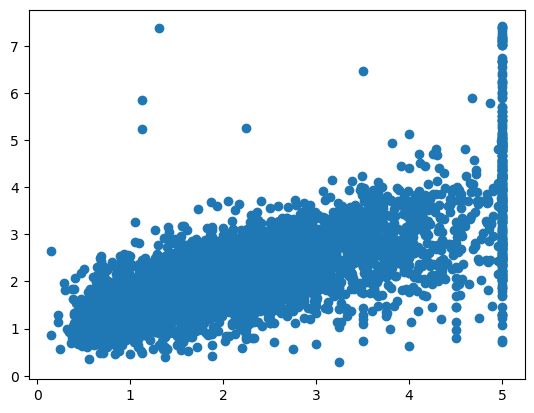

In [108]:
plt.scatter(y_test,y_pred)

In [110]:
error = y_test-y_pred

In [112]:
error

4712     1.555132
2151    -0.687432
15927   -0.172918
82      -0.325122
8161    -0.531842
           ...   
11387    0.115584
2523    -1.145502
18897   -0.740919
18878    0.344164
4287     0.460335
Name: Price, Length: 6192, dtype: float64

C:\Users\jarup\AppData\Local\Temp\ipykernel_20312\1567266927.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(error)


<Axes: xlabel='Price', ylabel='Density'>

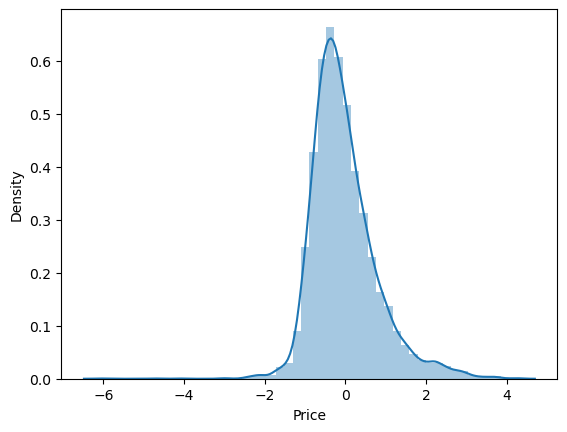

In [114]:
sns.distplot(error)

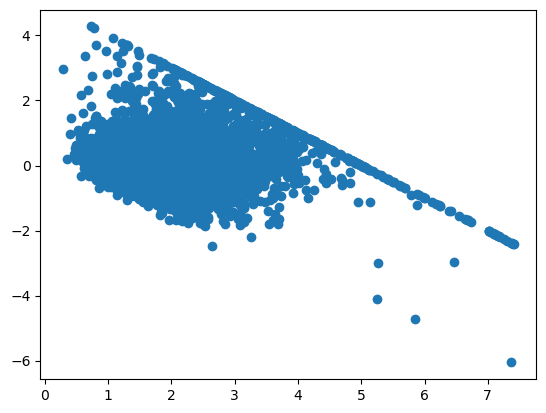

In [116]:
plt.scatter(y_pred,error)

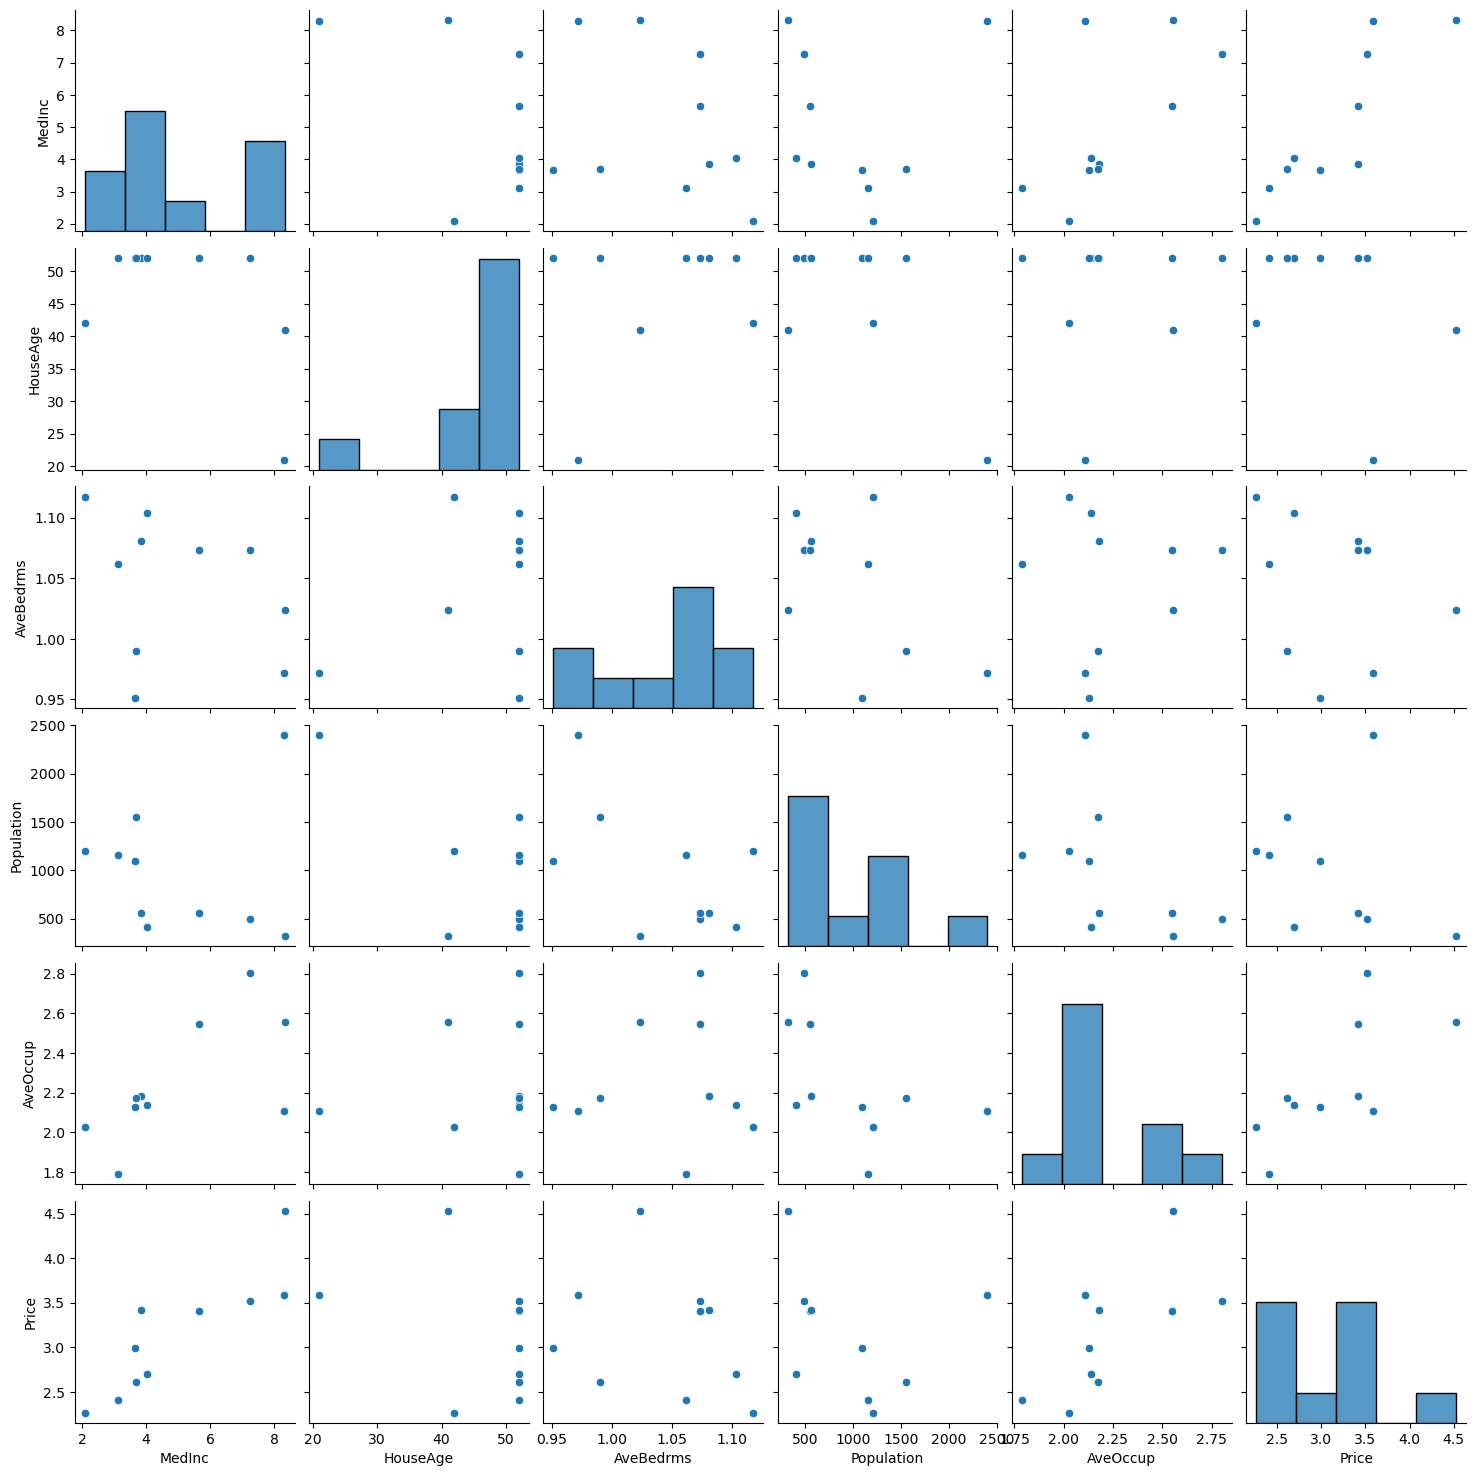

In [118]:
sns.pairplot(df1.iloc[0:10])

In [120]:
df1

,MedInc,HouseAge,AveBedrms,Population,AveOccup,Price
0,8.3252,41.0,1.023810,322.0,2.555556,4.526
1,8.3014,21.0,0.971880,2401.0,2.109842,3.585
2,7.2574,52.0,1.073446,496.0,2.802260,3.521
3,5.6431,52.0,1.073059,558.0,2.547945,3.413
4,3.8462,52.0,1.081081,565.0,2.181467,3.422
...,...,...,...,...,...,...
20635,1.5603,25.0,1.133333,845.0,2.560606,0.781
20636,2.5568,18.0,1.315789,356.0,3.122807,0.771
20637,1.7000,17.0,1.120092,1007.0,2.325635,0.923
20638,1.8672,18.0,1.171920,741.0,2.123209,0.847


In [122]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [124]:
#RFE >> recursive feature elemination
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [126]:
from sklearn.feature_selection import RFE

In [146]:
rfe=RFE(estimator = LinearRegression(),n_features_to_select=6)

In [148]:
rfe.fit(x,y)

RFE(estimator=LinearRegression(), n_features_to_select=6)

In [150]:
rfe.predict(x)

array([4.12430881, 3.97408244, 3.67418638, ..., 0.16610998, 0.31206347,
       0.51242078])

In [152]:
rfe.support_

array([ True,  True,  True,  True, False, False,  True,  True])

In [154]:
x.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [156]:
rfe.ranking_

array([1, 1, 1, 1, 3, 2, 1, 1])